In [10]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from YAML

In [26]:
import os
import shutil
import random

# 设置路径
train_images_path = 'datasets/FDDB.yolov8/train/images'
train_labels_path = 'datasets/FDDB.yolov8/train/labels'

test_images_path = 'datasets/FDDB.yolov8/test/images'
test_labels_path = 'datasets/FDDB.yolov8/test/labels'

# 创建 test 目录
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(test_labels_path, exist_ok=True)

# 设置要移动到 test 的图像数量
test_size = 950 

# 获取所有训练图像的文件名（假设图像为 .jpg 格式，标签为 .txt 格式）
image_files = [f for f in os.listdir(train_images_path) if f.endswith('.jpg')]

# 随机抽取指定数量的图像文件
test_images = random.sample(image_files, test_size)

# 将对应的图像和标签文件移动到 test 文件夹
for image_file in test_images:
    # 定位图像和标签文件路径
    image_path = os.path.join(train_images_path, image_file)
    label_path = os.path.join(train_labels_path, image_file.replace('.jpg', '.txt'))

    # 检查对应的标签文件是否存在，确保图像和标签对应
    if os.path.exists(label_path):
        # 移动图像文件到 test/images
        shutil.move(image_path, os.path.join(test_images_path, image_file))
        # 移动标签文件到 test/labels
        shutil.move(label_path, os.path.join(test_labels_path, image_file.replace('.jpg', '.txt')))
    else:
        print(f"标签文件缺失：{label_path}")

print(f"已成功将 {test_size} 张图像和对应标签文件移动到测试集。")


已成功将 950 张图像和对应标签文件移动到测试集。


In [29]:
results = model.train(
    # data="./datasets/Face detection.v1-fddb.yolov8/data.yaml", 
    data="./datasets/FDDB.yolov8/data.yaml", 
    epochs=100,                
    imgsz=640,                  
    lr0=0.01,                  
    batch=16,                 
    patience=20,                             
    model='yolov8n.pt'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
)


Ultralytics 8.3.28  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./datasets/FDDB.yolov8/data.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning C:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\FDDB.yolov8\train\labels... 6543 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6543/6543 [00:10<00:00, 629.17it/s]

train: WARNING  C:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\FDDB.yolov8\train\images\0_Parade_Parade_0_275_jpg.rf.b3518238896380772b8bbaf90841cece.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\FDDB.yolov8\train\images\21_Festival_Festival_21_604_jpg.rf.356bdd257e160a8068fbba7263b0767f.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\FDDB.yolov8\train\images\7_Cheering_Cheering_7_426_jpg.rf.0f7206752396835cf499c40cbcdb7eb8.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\FDDB.yolov8\train\images\img_704_jpg.rf.0a1bf65f3e63d607b46ec51c3d022c6c.jpg: 1 duplicate labels removed


train: New cache created: C:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\FDDB.yolov8\train\labels.cache


val: Scanning C:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\FDDB.yolov8\valid\labels... 578 images, 0 backgrounds, 0 corrupt: 100%|██████████| 578/578 [00:01<00:00, 359.37it/s]

val: New cache created: C:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\FDDB.yolov8\valid\labels.cache


Plotting labels to runs\detect\train22\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train22
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.83G      1.275     0.8174        1.3        258        640: 100%|██████████| 409/409 [10:32<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 2/19 [00:04<00:41,  2.47s/it]


RuntimeError: Caught RuntimeError in pin memory thread for device 0.
Original Traceback (most recent call last):
  File "c:\Users\pm\anaconda3\Lib\site-packages\torch\utils\data\_utils\pin_memory.py", line 38, in do_one_step
    data = pin_memory(data, device)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pm\anaconda3\Lib\site-packages\torch\utils\data\_utils\pin_memory.py", line 69, in pin_memory
    clone.update({k: pin_memory(sample, device) for k, sample in data.items()})
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pm\anaconda3\Lib\site-packages\torch\utils\data\_utils\pin_memory.py", line 59, in pin_memory
    return data.pin_memory(device)
           ^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.




image 1/1 c:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\Face detection.v1-fddb.yolov8\train\images\2002_07_23_big_img_808.jpg: 320x416 2 faces, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)


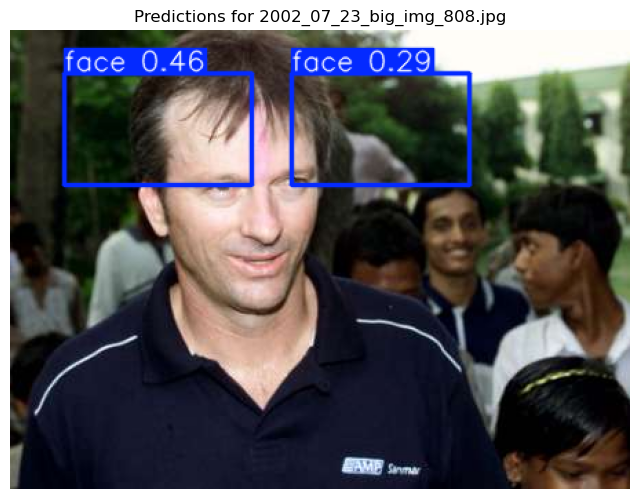


image 1/1 c:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\Face detection.v1-fddb.yolov8\train\images\img_1486_jpg.rf.cc16ff1dc5b256d4ce89584aa4e152b0.jpg: 416x416 1 face, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)


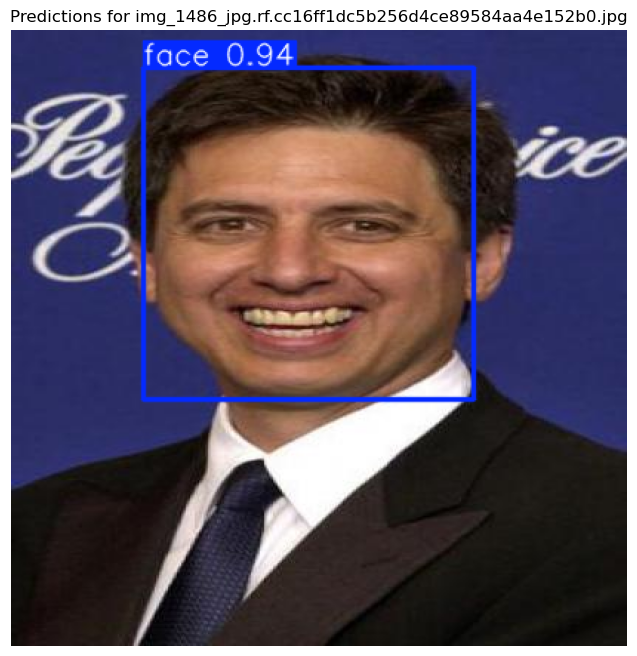


image 1/1 c:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\Face detection.v1-fddb.yolov8\train\images\img_705_jpg.rf.4d6012c7ac203f77a277a5882c89f4a8.jpg: 416x416 2 faces, 28.0ms
Speed: 2.0ms preprocess, 28.0ms inference, 6.0ms postprocess per image at shape (1, 3, 416, 416)


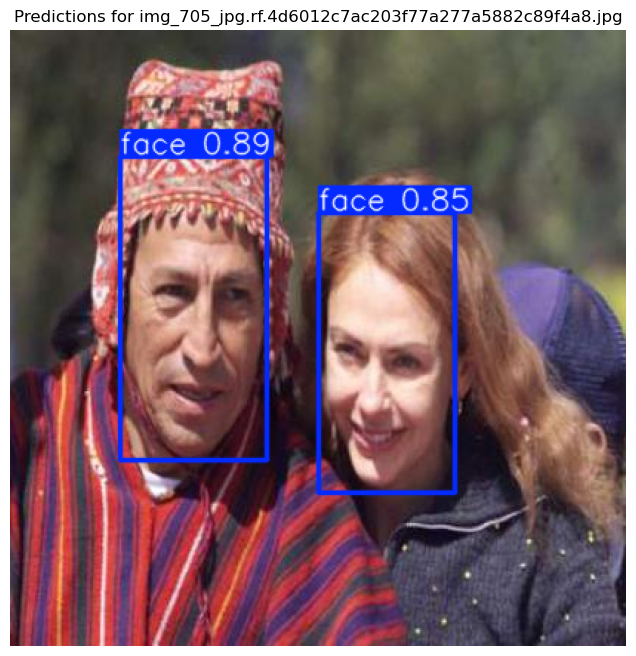


image 1/1 c:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\Face detection.v1-fddb.yolov8\train\images\2002_08_21_big_img_398.jpg: 416x320 2 faces, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 320)


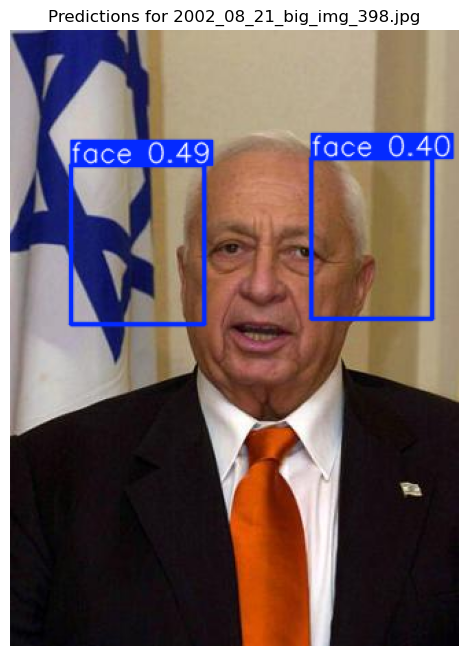


image 1/1 c:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\Face detection.v1-fddb.yolov8\train\images\51_Dresses_wearingdress_51_748_jpg.rf.46e0504df80838dcb160728a952dac5d.jpg: 416x320 1 face, 22.0ms
Speed: 3.0ms preprocess, 22.0ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 320)


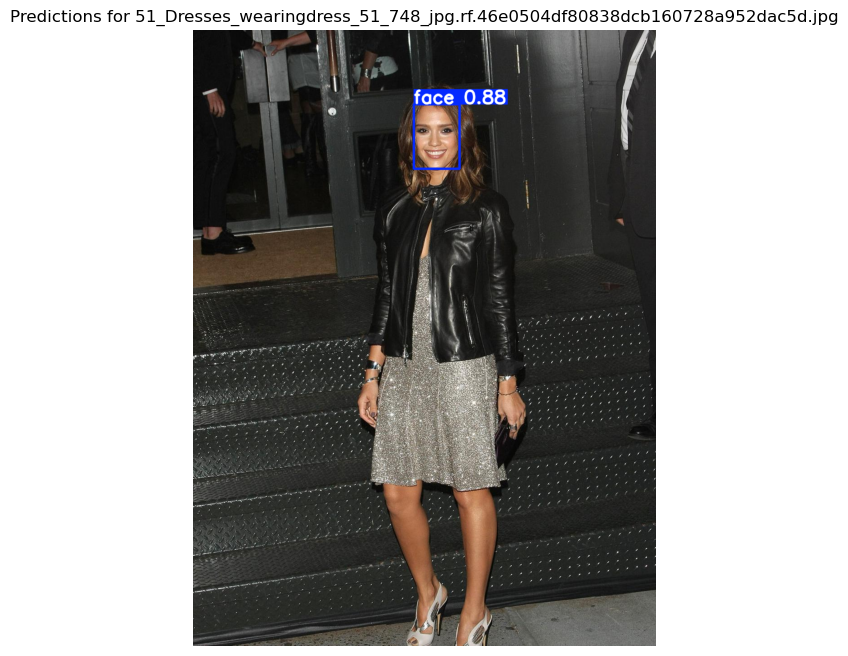


image 1/1 c:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\Face detection.v1-fddb.yolov8\train\images\img_3600_jpg.rf.f6b813458044bc71d0c0d4713d3e3132.jpg: 416x416 2 faces, 19.0ms
Speed: 2.0ms preprocess, 19.0ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 416)


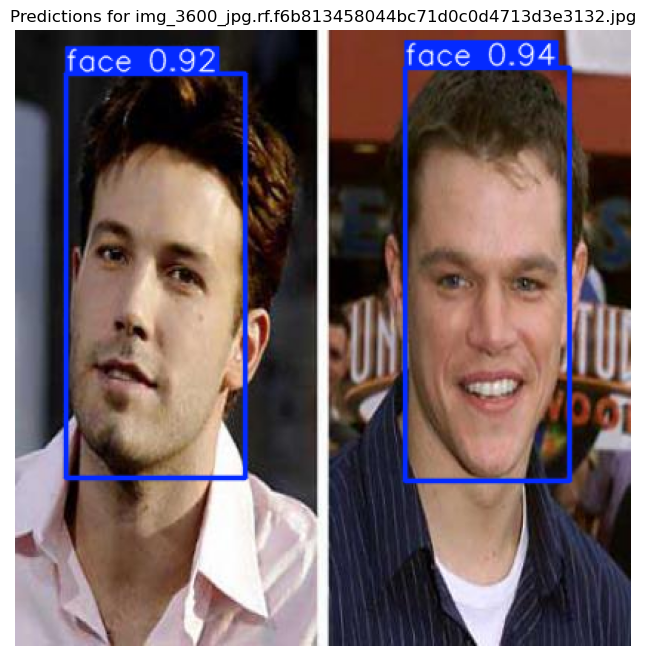


image 1/1 c:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\Face detection.v1-fddb.yolov8\train\images\img_764_jpg.rf.f8f15ac44a4bd5015ed86c9809ca7339.jpg: 416x416 1 face, 21.0ms
Speed: 2.0ms preprocess, 21.0ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 416)


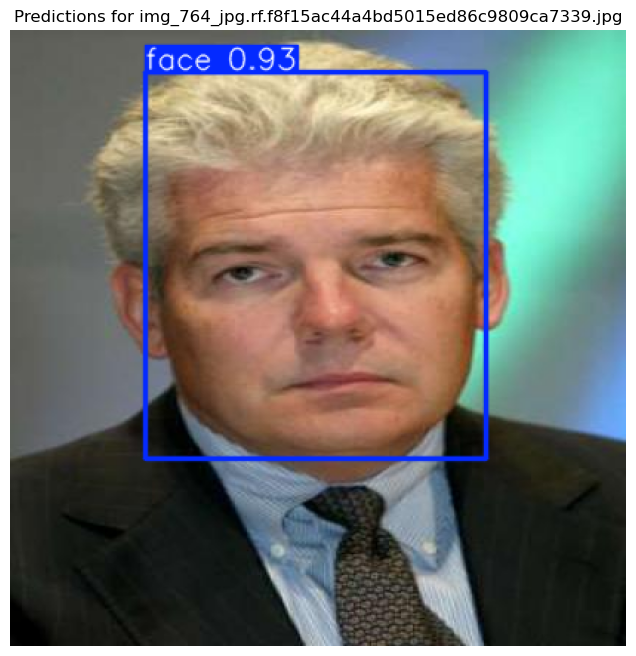


image 1/1 c:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\Face detection.v1-fddb.yolov8\train\images\img_1054_jpg.rf.6044190d65e39b78878dec35d1a29d31.jpg: 416x416 1 face, 20.0ms
Speed: 2.0ms preprocess, 20.0ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 416)


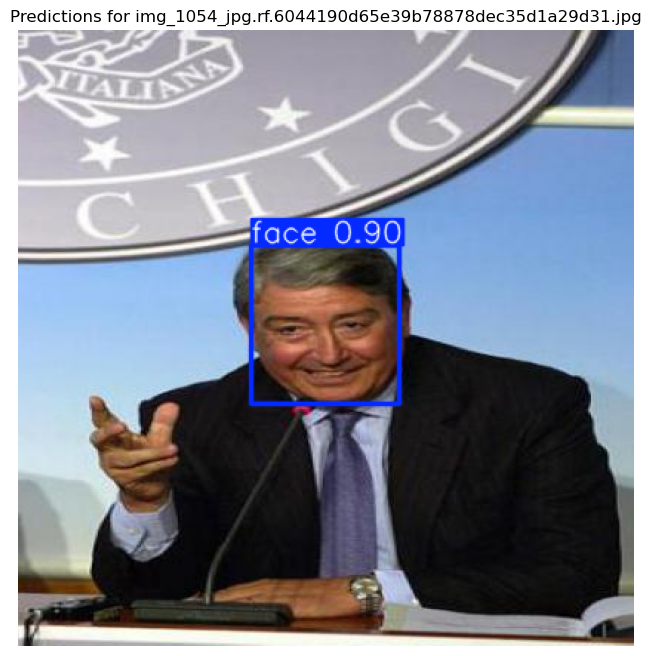


image 1/1 c:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\Face detection.v1-fddb.yolov8\train\images\2002_07_31_big_img_743.jpg: 416x352 2 faces, 45.7ms
Speed: 3.0ms preprocess, 45.7ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 352)


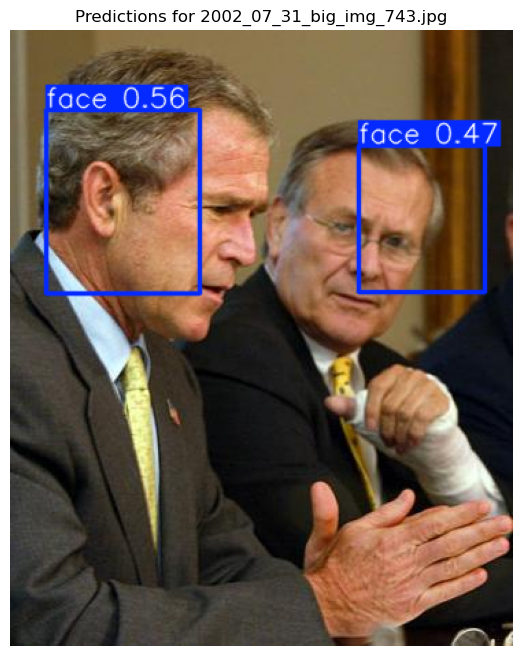


image 1/1 c:\Users\pm\Desktop\Final\YOLOv8ForSensitiveInformation\datasets\Face detection.v1-fddb.yolov8\train\images\2003_01_13_big_img_219.jpg: 416x288 2 faces, 18.0ms
Speed: 3.0ms preprocess, 18.0ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 288)


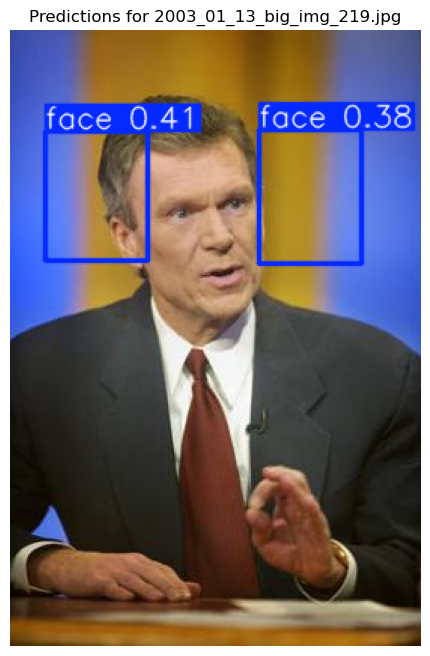

In [19]:
%matplotlib inline
import random
from ultralytics import YOLO
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# 加载模型
model = YOLO("runs/detect/train14/weights/best.pt")

# 设置训练集路径
train_images_dir = Path("datasets/Face detection.v1-fddb.yolov8/train/images")  # 替换为实际的训练图像文件夹路径

# 随机选择 10 张图像
all_images = list(train_images_dir.glob("*.jpg"))  # 假设图像是 JPG 格式，若为 PNG，请改为 "*.png"
random_images = random.sample(all_images, 10)

# 对每张图像进行推理并显示
for img_path in random_images:
    # 使用模型进行推理
    results = model.predict(source=str(img_path), save=False, imgsz=416)

    # 获取推理后的图像，添加检测框
    result_img = results[0].plot()  # YOLOv8 API 中可直接使用 plot() 获取带标注的图像

    # 使用 Matplotlib 显示图像
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Predictions for {img_path.name}")
    plt.show()
